In [133]:
import pandas as pd
import numpy as np
import os
from ta.utils import dropna
import ta.trend as ta_trend
import ta.momentum as ta_mmt
import ta.others as ta_other
import ta 

import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from tensorflow.keras.models import load_model
import joblib

In [144]:
ab_path = "../data/SPY-Daily-May23-Prediction.csv"

start_date='2023-01-01'  # First recoud 
end_date='2023-04-28'  # last record
# no bar=last record-start_date

AssetName="S&P500"

date_col='Date'
prediction_col='EMA1'
feature_cols=['EMA1']

input_sequence_length =60
output_sequence_length =10




In [135]:
print("Load model and scaler")
x_model = load_model("model/EMA1_60To10_SPY_E150S15-Y2015-2023_ma.h5")
x_scaler = joblib.load("model/scaler_EMA1_60To10_SPY_E150S15-Y2015-2023.gz")
x_scalerPred=joblib.load("model/scaler_pred_EMA1_60To10_SPY_E150S15-Y2015-2023.gz")



# x_model = load_model("model/best_tune_EMA1_60To10_SPY_E150S15-Y2015-2023.h5")
# x_scaler = joblib.load("model/scaler_best_tune_EMA1_60To10_SPY_E150S15-Y2015-2023.gz")
# x_scalerPred=joblib.load("model/scaler_pred_best_tune_EMA1_60To10_SPY_E150S15-Y2015-2023.gz")

print("Model and Scaler Object Summary")
print(x_model.summary())

#(max - min) / (X.max(axis=0) - X.min(axis=0))
print(f"max={x_scaler.data_max_} and min={x_scaler.data_min_} and scale={x_scaler.scale_}")
print(f"max={x_scalerPred.data_max_} and min={x_scalerPred.data_min_} and scale={x_scalerPred.scale_}")

Load model and scaler
Model and Scaler Object Summary
Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_1 (LSTM)               (None, 240)               232320    
                                                                 
 dropout_1 (Dropout)         (None, 240)               0         
                                                                 
 dense_1 (Dense)             (None, 10)                2410      
                                                                 
Total params: 234,730
Trainable params: 234,730
Non-trainable params: 0
_________________________________________________________________
None
max=[473.99] and min=[187.09] and scale=[0.00348554]
max=[473.99] and min=[187.09] and scale=[0.00348554]


D:\ProgramData\Anaconda3\envs\google_base\lib\site-packages\sklearn\base.py:318: UserWarning: Trying to unpickle estimator MinMaxScaler from version 1.2.1 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


# Load data and Create Feature uisng Technocal Analysis Indicator

In [136]:
df=pd.read_csv(f'{ab_path}',parse_dates=['Date/Time'],dayfirst=True)
df.rename(columns={'Date/Time':date_col},inplace=True)
df.drop(columns=['Ticker'],inplace=True)


df['EMA1']=ta_trend.ema_indicator(close=df['close'],window=10,fillna=True).round(4)
df['EMA2']=ta_trend.ema_indicator(close=df['close'],window=20,fillna=True).round(4)
df['MACD']=ta_trend.macd(close=df['close'], window_slow=20, window_fast=10, fillna=True).round(4)
df['SIGNAL']=ta_trend.macd_signal(close=df['close'], window_slow=20, window_fast=10,window_sign=15, fillna=True).round(4)

allCols=list(df.columns)
print(allCols)


df.set_index(date_col,inplace=True)
df=df.loc[start_date:end_date]
print(df.info())
df.tail()

df.info()
df.tail(10)

['Date', 'close', 'EMA1', 'EMA2', 'MACD', 'SIGNAL']
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2023-01-03 to 2023-04-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   81 non-null     float64
 1   EMA1    81 non-null     float64
 2   EMA2    81 non-null     float64
 3   MACD    81 non-null     float64
 4   SIGNAL  81 non-null     float64
dtypes: float64(5)
memory usage: 3.8 KB
None
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 81 entries, 2023-01-03 to 2023-04-28
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   close   81 non-null     float64
 1   EMA1    81 non-null     float64
 2   EMA2    81 non-null     float64
 3   MACD    81 non-null     float64
 4   SIGNAL  81 non-null     float64
dtypes: float64(5)
memory usage: 3.8 KB


,close,EMA1,EMA2,MACD,SIGNAL
Date,,,,,
2023-04-17,413.94,409.6812,406.0887,3.5924,2.1738
2023-04-18,414.21,410.5046,406.8622,3.6424,2.3574
2023-04-19,414.14,411.1656,407.5553,3.6102,2.5140
2023-04-20,411.88,411.2955,407.9672,3.3283,2.6158
2023-04-21,412.20,411.4599,408.3703,3.0896,2.6750
2023-04-24,412.63,411.6727,408.7760,2.8967,2.7027
2023-04-25,406.08,410.6558,408.5192,2.1366,2.6319
2023-04-26,404.36,409.5111,408.1231,1.3880,2.4765
2023-04-27,412.41,410.0382,408.5314,1.5068,2.3552


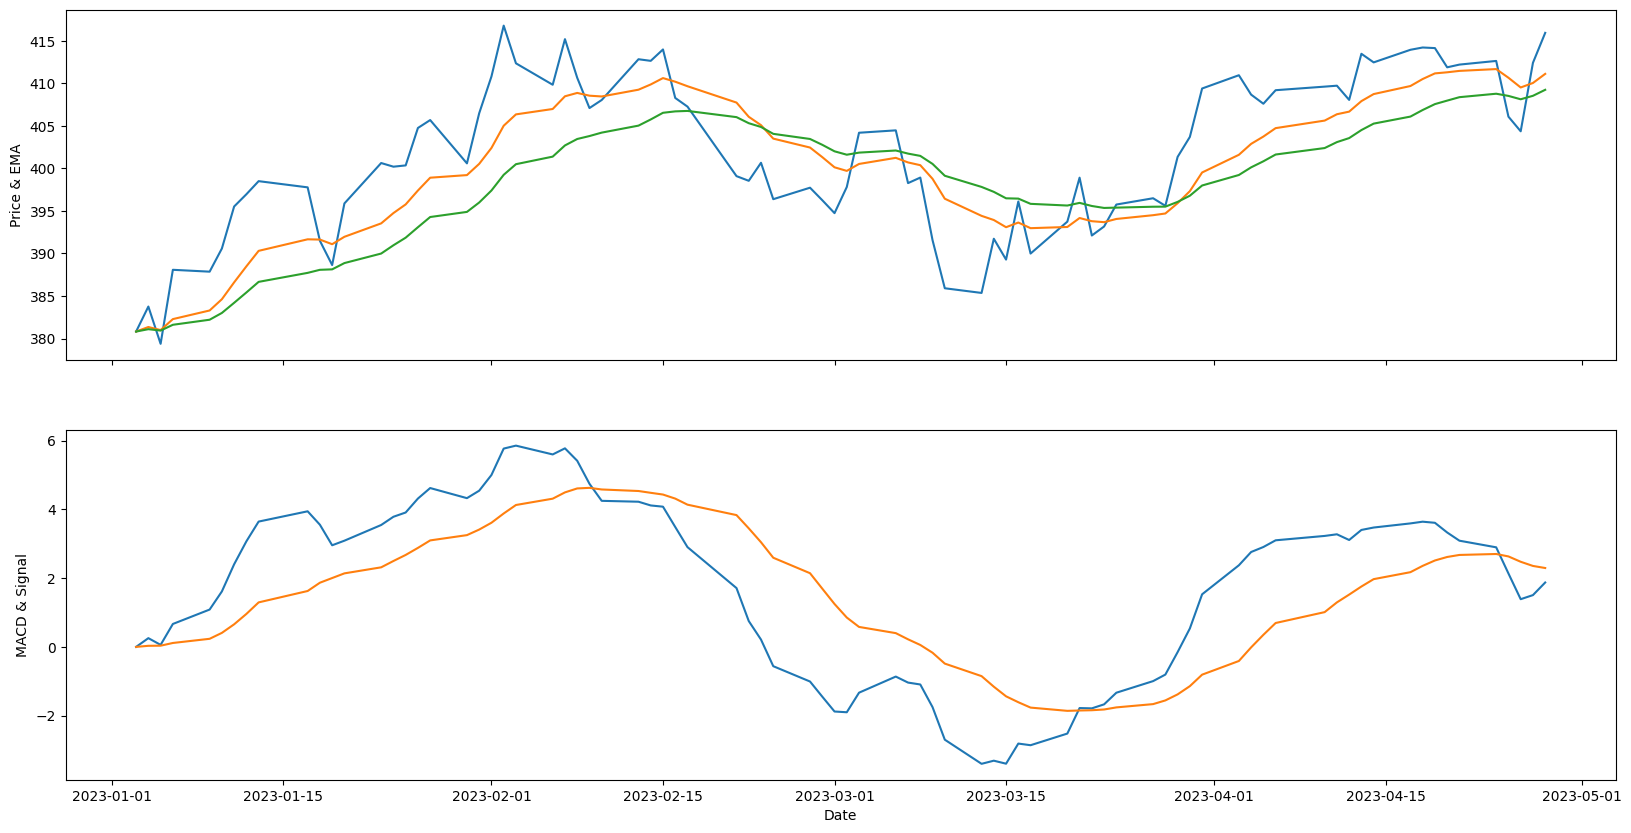

In [137]:
plt.subplots(2, 1, figsize = (20, 10),sharex=True)

ax1 = plt.subplot(2, 1, 1)
plt.plot(df[['close','EMA1','EMA2']])
plt.ylabel('Price & EMA')

ax2 = plt.subplot(2, 1, 2)
plt.plot(df[['MACD','SIGNAL']])
plt.xlabel('Date')
plt.ylabel('MACD & Signal')

plt.show()

# Get only Feature to Predict itself in the next N days

In [138]:
# get data last 60 days (select * from table limit 60) to predict tomorow at 
# 12:00 For S&P
# 08:00 For SET Thailand

dfForPred=df[feature_cols]
#dfForPred=dfForPred.iloc[-(input_sequence_length+1):-1,:]
dfForPred=dfForPred.iloc[-input_sequence_length:,:]
print(dfForPred.info())
print(dfForPred.shape)
print(dfForPred.tail(5))


# dfForPred.plot(figsize = (20, 10))
# plt.show()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2023-02-02 to 2023-04-28
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA1    60 non-null     float64
dtypes: float64(1)
memory usage: 960.0 bytes
None
(60, 1)
                EMA1
Date                
2023-04-24  411.6727
2023-04-25  410.6558
2023-04-26  409.5111
2023-04-27  410.0382
2023-04-28  411.1094


In [141]:
xUnscaled=dfForPred.values #print(xUnscaled.shape)
xScaled=x_scaler.transform(xUnscaled)
print(xScaled.shape)
print(xScaled[-5:])

# # Way1
# xScaledToPredict = []
# xScaledToPredict.append(xScaled)
# print(len(xScaledToPredict))

# yPredScaled=x_model.predict(np.array(xScaledToPredict))
# print(yPredScaled.shape,yPredScaled)

# yPred  = x_scalerPred.inverse_transform(yPredScaled.reshape(-1, 1))
# print(yPred.shape,yPred)

#Way2
xScaledToPredict= xScaled.reshape(1,input_sequence_length,len(feature_cols))
print(xScaledToPredict.shape)

yPredScaled = x_model.predict(xScaledToPredict)
print(yPredScaled.shape, yPredScaled)

yPred = x_scalerPred.inverse_transform(yPredScaled).reshape(-1, 1)
print(yPred.shape, yPred)


print("============================Summary============================")
print(xUnscaled.shape)
print(yPred.shape)

# print("============================Input============================")
# print(xUnscaled)
# print("============================Output============================")
# print(yPred)



(60, 1)
[[0.78279087]
 [0.77924643]
 [0.77525654]
 [0.77709376]
 [0.78082747]]
(1, 60, 1)
1/1 [==============================] - 0s 49ms/step
(1, 10) [[0.79185003 0.79208195 0.7855618  0.7749264  0.7786799  0.7762255
  0.760689   0.7973112  0.7843642  0.7888163 ]]
(10, 1) [[414.27176]
 [414.33832]
 [412.46768]
 [409.4164 ]
 [410.49326]
 [409.7891 ]
 [405.3317 ]
 [415.8386 ]
 [412.1241 ]
 [413.4014 ]]
============================Summary============================
(60, 1)
(10, 1)


In [142]:
# data result
# datePredction: date  ,  dataToPredict: [date,ema1]  ,predictionResult:[value] 

In [168]:
colInput='feature'
colOutput='prediction'
dfFeature=pd.DataFrame(data= xUnscaled,columns=feature_cols)
dfFeature['Type']=colInput
#dfFeature['date']=
dfPrediction=pd.DataFrame(data= yPred,columns=feature_cols)
dfPrediction['Type']=colOutput
#dfPrediction['date']=
dfResult=pd.concat([dfFeature,dfPrediction],ignore_index=True)
print(dfResult.info())
print(dfResult)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70 entries, 0 to 69
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   EMA1    70 non-null     float64
 1   Type    70 non-null     object 
dtypes: float64(1), object(1)
memory usage: 1.2+ KB
None
          EMA1        Type
0   405.014300     feature
1   406.348100     feature
2   406.981200     feature
3   408.473700     feature
4   408.869400     feature
..         ...         ...
65  409.789093  prediction
66  405.331696  prediction
67  415.838593  prediction
68  412.124115  prediction
69  413.401398  prediction

[70 rows x 2 columns]


<Axes: title={'center': 'S&P500 - 60 days ago to predict next 10 days'}, ylabel='EMA1'>

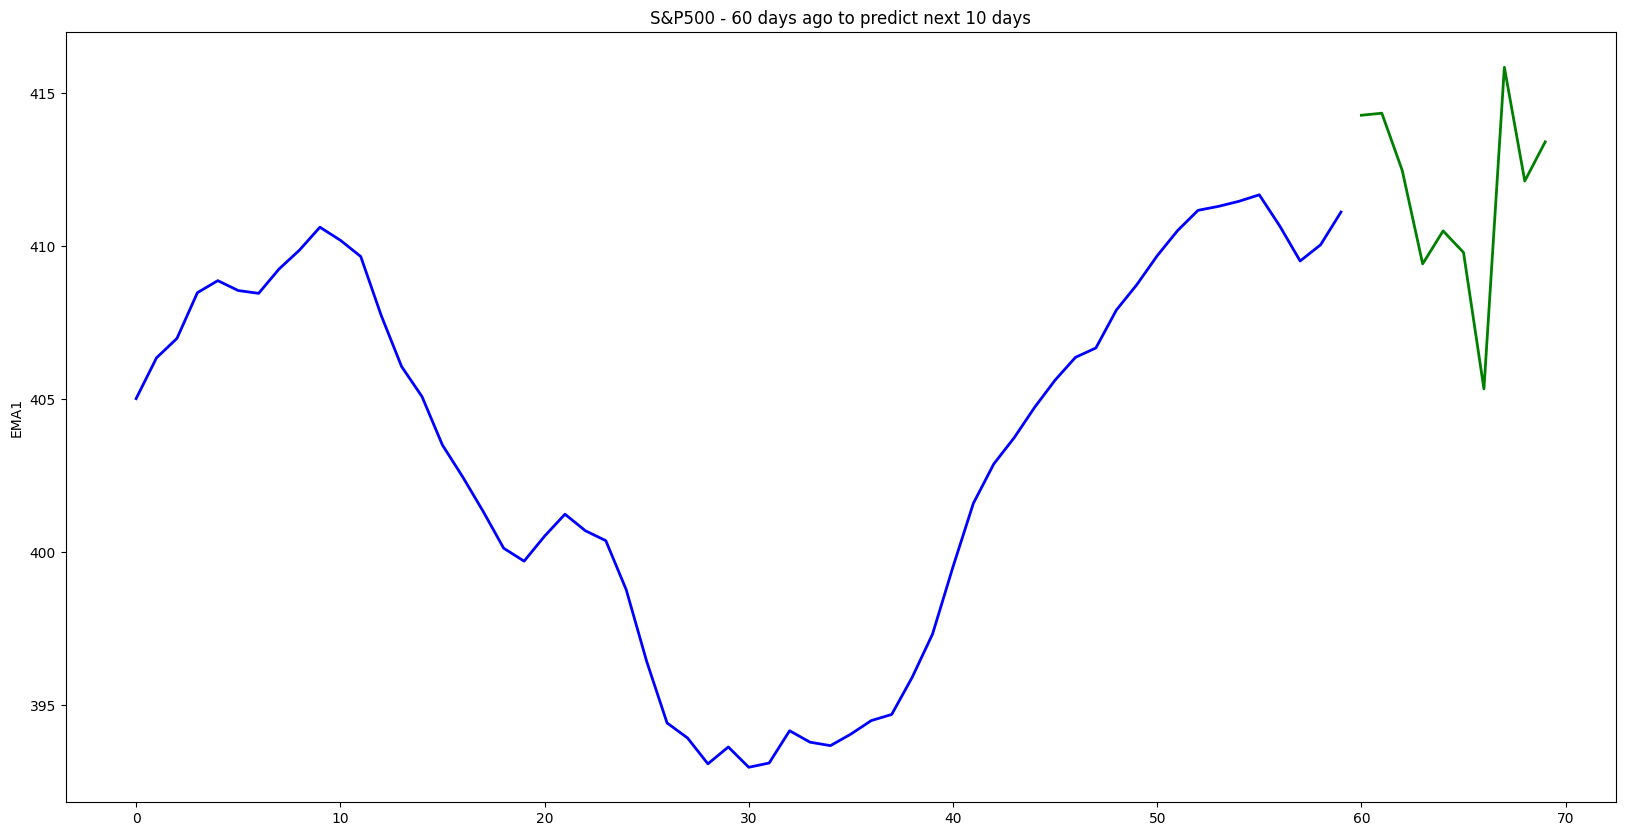

In [175]:
fig, ax = plt.subplots(figsize=(20, 10))
plt.title(f"{AssetName} - {input_sequence_length} days ago to predict next {output_sequence_length} days", fontsize=12)
# sns.lineplot(data = dfResult[prediction_col], linewidth=4.0,  markers='o',ax=ax,color='black')
sns.lineplot(data = dfResult.query("Type==@colInput")[prediction_col], linewidth=2.0, ax=ax,color='blue')
sns.lineplot(data = dfResult.query("Type==@colOutput")[prediction_col], linewidth=2.0, ax=ax,color='green')